In [103]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from utils import load_checkpoint, cnn_test_step
import pandas as pd
from dataloader import CustomDataloader
from networks import CNNRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score




# Model 1 - Linear Regression Analysis

In [104]:

#load pkl files and plot the data
regression_theta = torch.load('tensor_collection\\lr_theta.pt').numpy()
regression_train_loss = torch.load('tensor_collection\\lr_train_loss.pt')
regression_val_loss = torch.load('tensor_collection\\lr_val_loss.pt')
cm_x_test = torch.load('tensor_collection\\cm_x_test.pt')
cm_y_test = torch.load('tensor_collection\\cm_y_test.pt')


Final training loss: 67.5159912109375
Final validation loss: 63.67375183105469


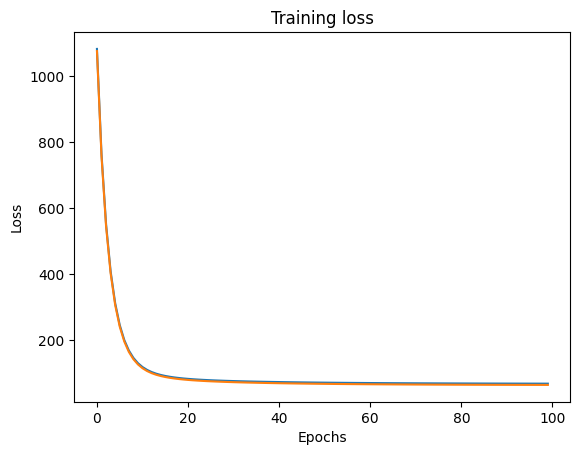

In [105]:
# plot the losses over time
plt.figure(0)
plt.plot(regression_train_loss)
plt.plot(regression_val_loss)
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

print('Final training loss:', regression_train_loss[-1].item())
print('Final validation loss:', regression_val_loss[-1].item())

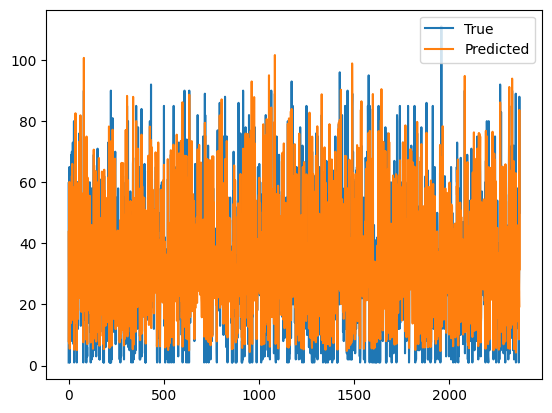

In [106]:
cm_y_hat = cm_x_test @ regression_theta

plt.figure()
plt.plot(cm_y_test)
plt.plot(cm_y_hat)
plt.legend(['True', 'Predicted'])

In [107]:

predictions = np.array(cm_y_hat)
actuals = np.array(cm_y_test)

mse = mean_squared_error(actuals, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(actuals, predictions)
r2 = r2_score(actuals, predictions)

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R-Squared: {r2}')





MSE: 65.5480439678473
RMSE: 8.096174650280668
MAE: 6.107565910509712
R-Squared: 0.8340745077582645


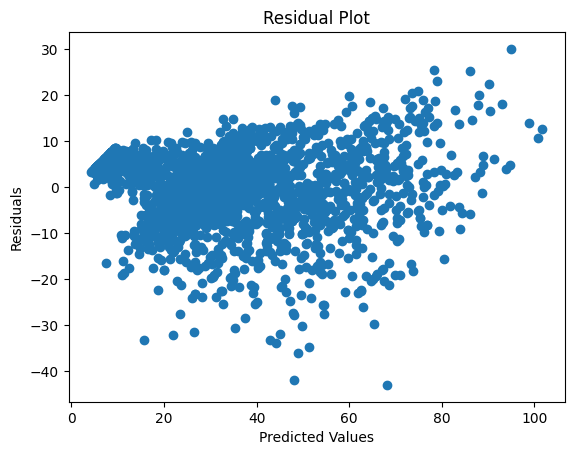

In [108]:
#Residual Plot
plt.figure(2)
plt.scatter(cm_y_hat, cm_y_hat-cm_y_test)
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# Model 2 - Convolutional Neural Network Analysis

In [109]:
cnn_x_test_dataset = pd.read_csv('tensor_collection\\cnn_x_test.csv', delimiter=',', header=None)
cnn_y_test_dataset = torch.load('tensor_collection\\cnn_y_test.pt',)

In [110]:
cnn_train_loss = torch.load('tensor_collection\\cnn_train_losses.pt')
cnn_val_loss = torch.load('tensor_collection\\cnn_val_losses.pt')


Final training loss: 210.47108623325425
Final validation loss: 290.6844418174342


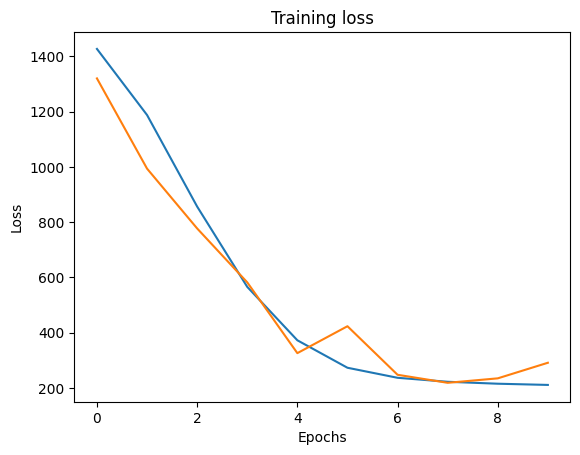

In [111]:
# plot the losses over time
plt.figure(3)
plt.plot(cnn_train_loss)
plt.plot(cnn_val_loss)
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

print('Final training loss:', cnn_train_loss[-1])
print('Final validation loss:', cnn_val_loss[-1])

In [112]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Assuming you have defined CNNRegression and MultiModalNetwork classes
model_cnn = CNNRegression().to(device)

model_cnn, epochs = load_checkpoint('model_checkpoints\\cnn_checkpoint_final.pth', model_cnn)


In [113]:
batch_sz=50
print(cnn_x_test_dataset.head())

                                                   0
0                                           filename
1   data\images\1_0_3_20161219230525895.jpg.chip.jpg
2  data\images\60_0_0_20170120223043268.jpg.chip.jpg
3  data\images\21_0_3_20170104230718873.jpg.chip.jpg
4   data\images\3_1_2_20161219141400280.jpg.chip.jpg


In [114]:
test_dataloader = CustomDataloader(dataframe=cnn_x_test_dataset, age=cnn_y_test_dataset, batch_size=batch_sz, randomize=False)

In [115]:
model_cnn.eval()  # Set the model to evaluation mode

predictions = []
actuals = []

predictions, actuals = cnn_test_step(model_cnn, test_dataloader, device)


KeyError: 'filename'

In [ ]:
# Converting lists to numpy arrays for calculation
predictions = np.array(predictions)
actuals = np.array(actuals)

mse = mean_squared_error(actuals, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(actuals, predictions)
r2 = r2_score(actuals, predictions)

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R-Squared: {r2}')

# Model 3 - Multi Modal Neural Network - Analysis

In [116]:
mnn_x_test_dataset = pd.read_csv('tensor_collection\\mnn_x_test.csv', delimiter=',', header=None)
mnn_y_test_dataset = torch.load('tensor_collection\\mnn_y_test.pt',)


In [117]:
mnn_train_loss = torch.load('tensor_collection\\mmn_train_losses.pt')
mnn_val_loss = torch.load('tensor_collection\\mmn_val_losses.pt')

In [121]:
print(mnn_train_loss)
print(mnn_val_loss)

[14487806.521798972, 1013.4653828256082, 912.7501122391463, 896.3019822907928, 877.9912084797085, 854.1140077322121, 829.3687131740903, 806.2658670924654, 773.6351857025352, 738.7210492639733]
[3655.5453202097037, 981.4636037726151, 939.6118324681332, 958.6715055766858, 885.9133332905017, 878.1802303916529, 835.8826647306744, 812.2498907791941, 778.9249781558389, 783.221923828125]


Final training loss: 738.7210492639733
Final validation loss: 783.221923828125


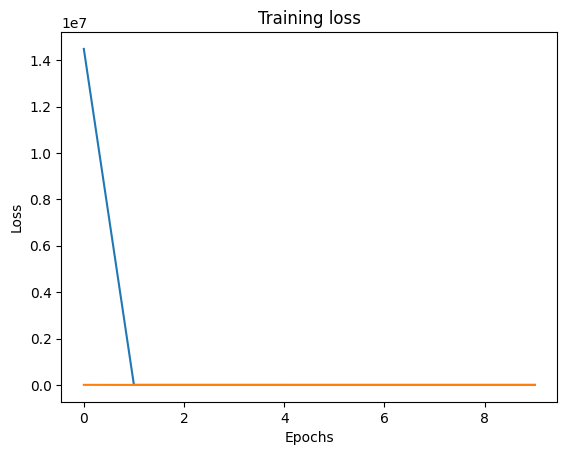

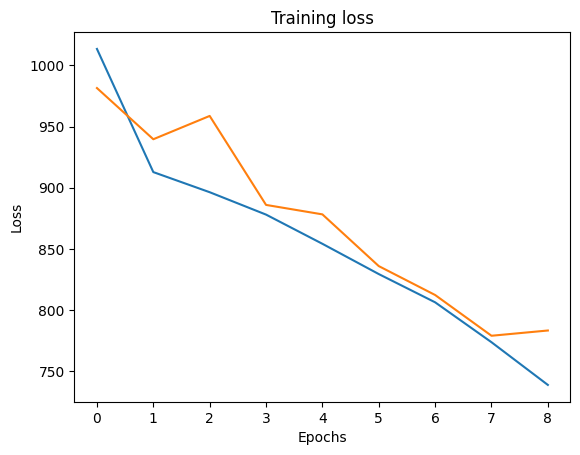

In [124]:
plt.figure(4)
plt.plot(mnn_train_loss)
plt.plot(mnn_val_loss)
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

# plot the losses over time
plt.figure(5)
plt.plot(mnn_train_loss[1:])
plt.plot(mnn_val_loss[1:])
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

print('Final training loss:', mnn_train_loss[-1])
print('Final validation loss:', mnn_val_loss[-1])

In [120]:

model_multimodal = MultiModalNetwork(num_numerical_features=NUM_FEATURES).to(device)  # Replace NUM_FEATURES with the correct number

model_multimodal = load_checkpoint('path_to_multimodal_checkpoint.pth', model_multimodal, device)

model_multimodal.eval()

NameError: name 'MultiModalNetwork' is not defined

In [ ]:
#load 
train_losses = torch.load('tensor_collection\\cnn_train_losses.pt')
val_losses = torch.load('tensor_collection\\cnn_val_losses.pt')

print(train_losses.shape)



AttributeError: 'list' object has no attribute 'shape'

Text(0, 0.5, 'Loss')

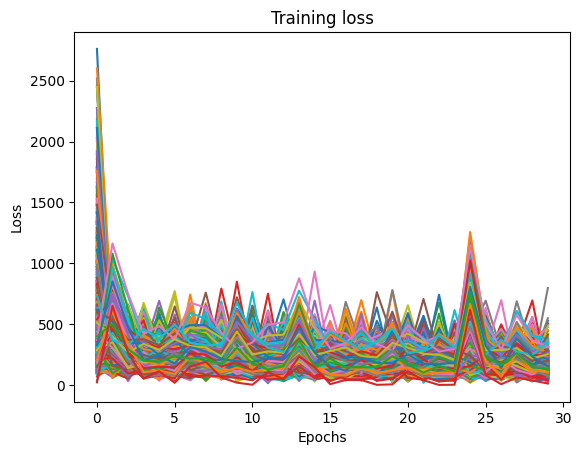

In [ ]:
#plot the losses over time
plt.figure(3)
plt.plot(train_losses)
plt.plot(val_losses)
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')


In [ ]:
train_losses = torch.load('tensor_collection\\mmn_train_losses.pt')
val_losses = torch.load('tensor_collection\\mmn_val_losses.pt')
epochs = torch.load('tensor_collection\\mmn_epochs.pt')

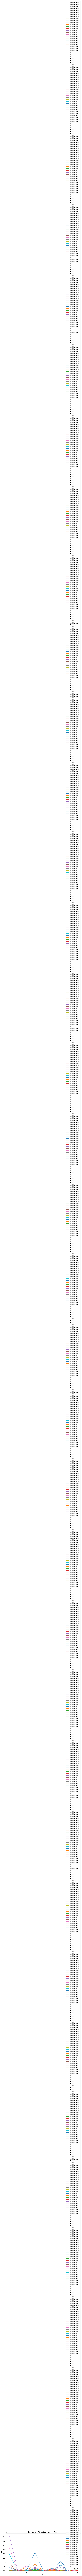

Final validation loss: 229.35543517946448


In [ ]:
# Plot with a restricted range after the initial loss drop
plt.figure(figsize=(10, 5))
plt.plot(train_losses[1:], label='Training loss')  # Skip the first loss if it's an outlier
plt.plot(val_losses[1:], label='Validation loss')  # Skip the first loss if it's an outlier
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss per Epoch')
plt.ylim(bottom=0)  # Set the bottom of the y-axis to 0
plt.show()
print('Final validation loss:',val_losses[-1])
